## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# Star Hotels Project

## Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Import Dataset

In [2]:
hotel = pd.read_csv("StarHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset

In [4]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10000,2,Canceled


<IPython.core.display.Javascript object>

In [5]:
data.tail()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
56921,2,1,0,1,Meal Plan 2,0,Room_Type 4,45,2019,6,15,Online,0,0,0,163.88000,1,Not_Canceled
56922,2,0,1,1,Meal Plan 1,0,Room_Type 1,320,2019,5,15,Offline,0,0,0,90.00000,1,Canceled
56923,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
56924,2,0,2,2,Not Selected,0,Room_Type 1,6,2019,4,28,Online,0,0,0,162.50000,2,Not_Canceled
56925,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


<IPython.core.display.Javascript object>

### Understand the shape of the dataset

In [6]:
data.shape

(56926, 18)

<IPython.core.display.Javascript object>

* The dataset has 56926 rows and 18 columns 

### Check the data types of the columns for the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

* `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of object type while rest columns are numeric in nature.

* There are no null values in the dataset.

In [8]:
# checking for duplicate values
data.duplicated().sum()

14350

<IPython.core.display.Javascript object>

- There are 14350 duplicate values in the data. 
- Let's drop these values.

In [9]:
data.drop_duplicates(inplace=True)

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,42576.00000,1.91674,0.52752,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,42576.00000,0.14215,0.45992,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,42576.00000,0.89527,0.88786,0.00000,0.00000,1.00000,2.00000,8.00000
no_of_week_nights,42576.00000,2.32117,1.51933,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,42576.00000,0.03436,0.18216,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,42576.00000,77.31595,77.27962,0.00000,16.00000,53.00000,118.00000,521.00000
arrival_year,42576.00000,2018.29789,0.62613,2017.00000,2018.00000,2018.00000,2019.00000,2019.00000
arrival_month,42576.00000,6.36549,3.05192,1.00000,4.00000,6.00000,9.00000,12.00000
arrival_date,42576.00000,15.68287,8.81399,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,42576.00000,0.03089,0.17301,0.00000,0.00000,0.00000,0.00000,1.00000


<IPython.core.display.Javascript object>

* The number of adults ranges from 0 to 4, which is usual.
* The maximum value in the number of children column is 10, which is a bit unusual and might require a check.
* The range of the number of weeks and weekend nights seems fine. Though 8 weekends might be a very long stay.
* At least 75% of the customers do not require car parking space.
* On average the customers are book 77 days in advance. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.
* We have three years of data starting from 2017 to 2019.
* At least 75% of the customers are not repeating customers.
* The average price per room is 112 euros. There's a huge difference between the 75th percentile and the maximum value which indicates there might be outliers present in this column.

### Univariate Analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on lead time

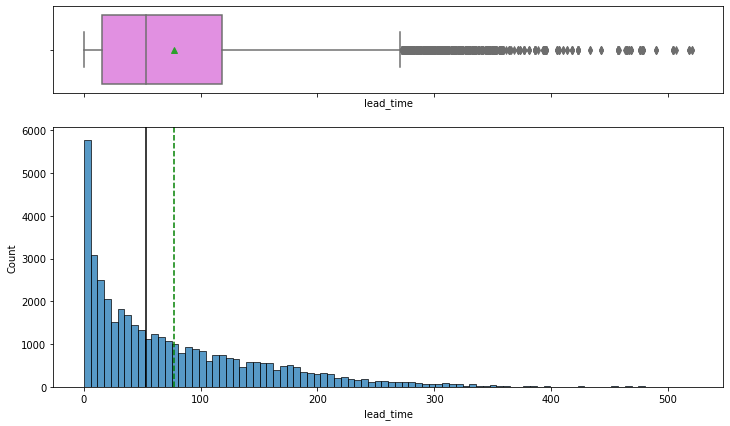

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(data, "lead_time")

- Outlier Information
- The distribution of lead time is right-skewed, and there are many outliers.
- Some customers made booking 500 days in advance.
- Many customers have made the booking on the same day of arrival as well.

### Observations on average price per room

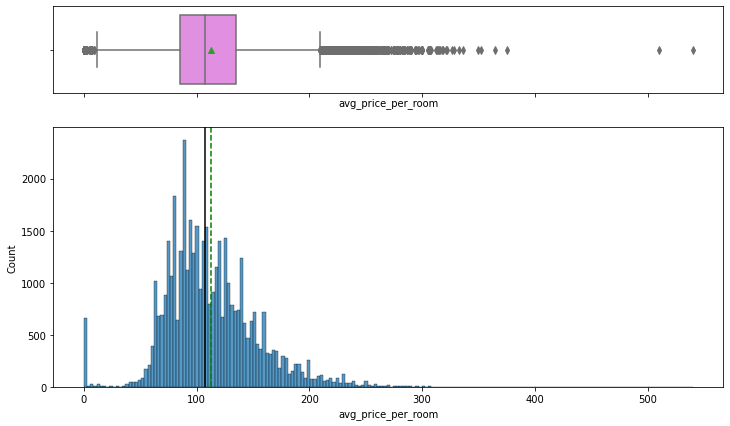

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(data, "avg_price_per_room")

* The distribution of average price per room is skewed to right. There are outliers on both sides.
* The average price of a room is around ~100 euros.
* There are only two observations where the average price of the room is more than 500 euros. These 2 observations are quite far away from the rest of the values. Instead of dropping them, we will clip these outliers to the upper whisker (Q3 + 1.5 * IQR).
* Interestingly some rooms have a price equal to 0. Let's check them.

In [14]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
98,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
129,1,0,2,0,Meal Plan 1,0,Room_Type 1,17,2019,5,28,Complementary,1,0,3,0.00000,1,Not_Canceled
226,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
324,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
399,1,0,0,0,Meal Plan 1,0,Room_Type 1,23,2019,1,11,Online,0,0,0,0.00000,2,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56418,2,0,0,0,Meal Plan 1,0,Room_Type 1,30,2017,10,8,Online,0,0,0,0.00000,0,Not_Canceled
56462,2,0,0,1,Meal Plan 1,0,Room_Type 6,4,2019,6,2,Complementary,1,4,13,0.00000,3,Not_Canceled
56471,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
56624,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled


<IPython.core.display.Javascript object>

- There are quite a few hotel rooms which have a price equal to 0.
- In the market segment column, it looks like many values are complementary.

In [15]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    457
Online           184
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

* It makes sense that most values with room prices equal to 0 are the rooms given as complimentary service given by the hotel.
* The rooms booked online must be a part of some promotional campaign done by the hotel.

In [16]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

209.25

<IPython.core.display.Javascript object>

In [17]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

<IPython.core.display.Javascript object>

### Observations on number of previous booking cancellations

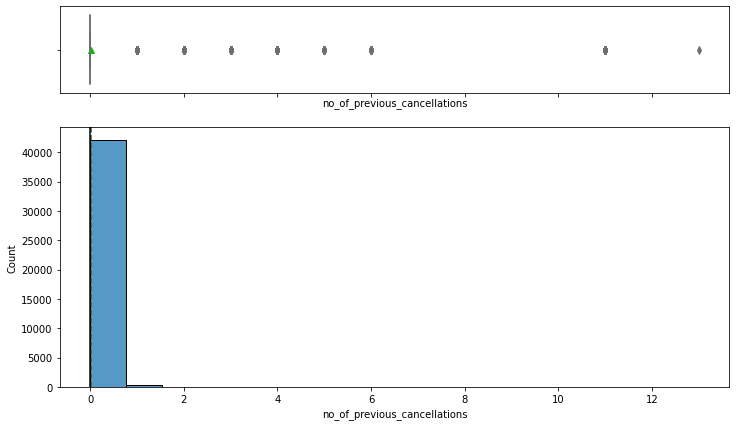

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "no_of_previous_cancellations")

* Very few customers have more than one cancellation.
* Some customers canceled more than 12 times.

### Observations on number of previous booking not canceled

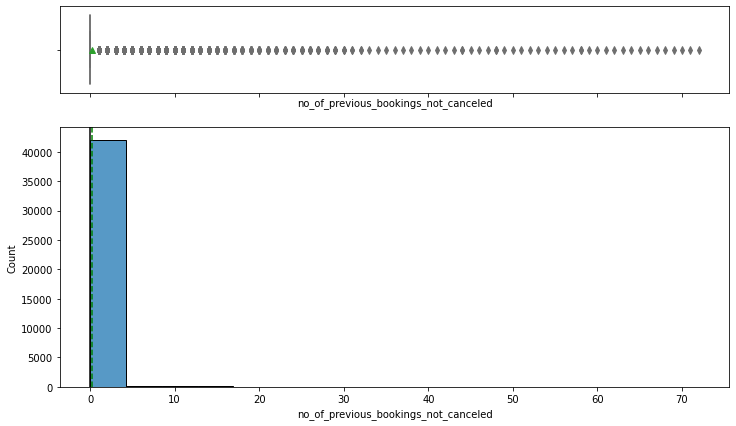

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

* Very few customers have more than 1 booking not canceled previously.
* Some customers have not canceled their bookings 70 times.

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on number of adults

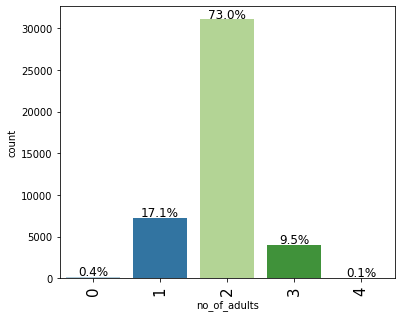

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(data, "no_of_adults", perc=True)

* 73% of the bookings were made for 2 adults.

### Observations on number of children

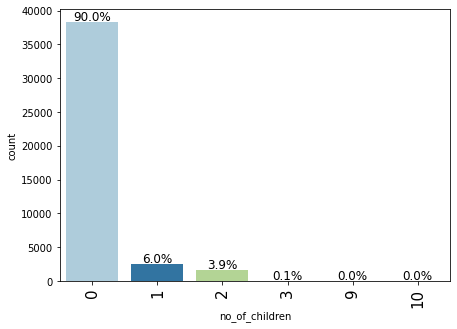

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(data, "no_of_children", perc=True)

* 90% of the customers didn't make reservations for children.
* There are some values in the data where the number of children is 9 or 10, which is highly unlikely. 
* We will replace these values with the maximum value of 3 children.

In [23]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

<IPython.core.display.Javascript object>

### Observations on number of week nights

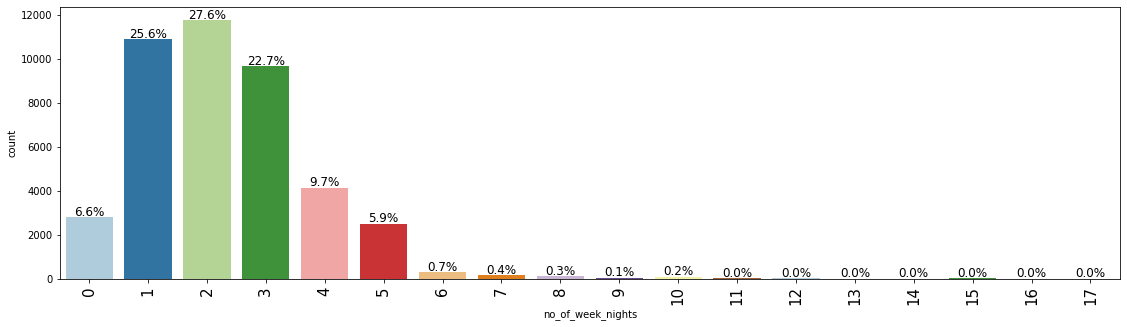

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(data, "no_of_week_nights", perc=True)

* Most bookings are made for 2 nights (27.6%) followed by 1 night (25.6%).
* A very less proportion of customers made the booking for more than 15 days.

### Observations on number of weekend nights

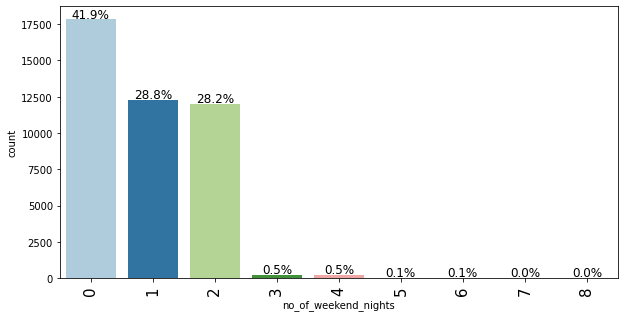

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)

* 41.9% of the customers do not plan to spend the weekend in the hotel.
* The percentage of customers planning to spend 1 or 2 weekends in the hotel is almost the same (28%).

### Observations on required car parking space

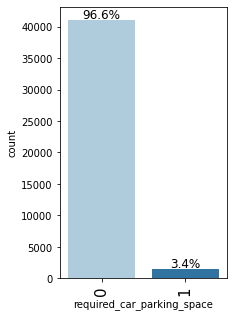

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data, "required_car_parking_space", perc=True)

* 96.6% of the customers do not require a car parking space.

### Observations on type of meal plan

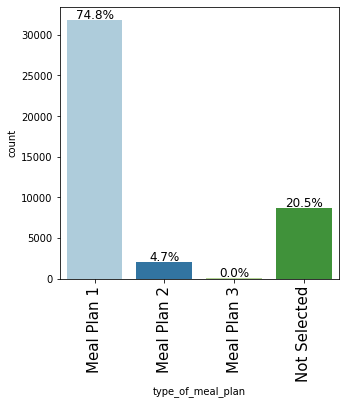

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

* Most of the customers prefer meal plan 1 that is only breakfast.
* 20.5% of the customers didn't select a meal plan.

### Observations on room type reserved

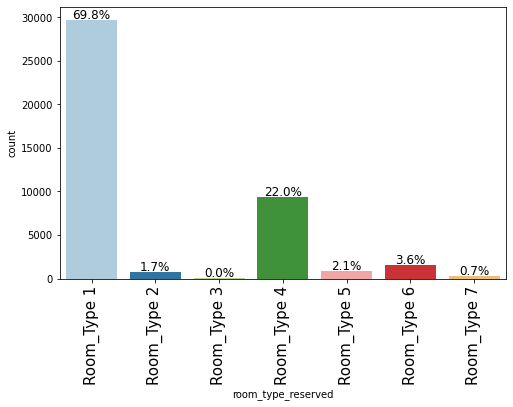

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(data, "room_type_reserved", perc=True)

* Around 70% of the customers booked Room_Type 1 followed by 22% of the customers booking Room_Type 4.

### Observations on arrival month

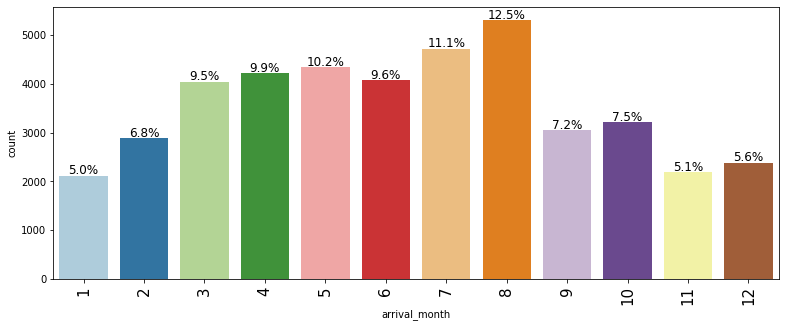

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(data, "arrival_month", perc=True)

* August is the busiest month for the hotel followed by July.
* 12.5% of the bookings were made in August.

### Observations on market segment type

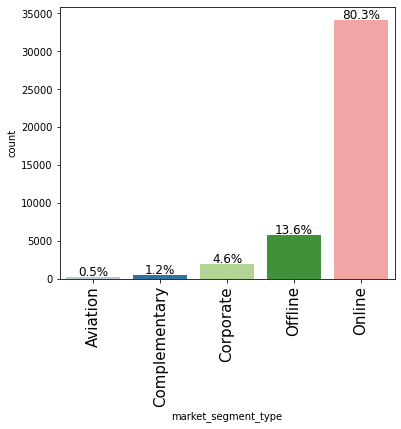

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(data, "market_segment_type", perc=True)

* 80% of the hotel booking were made online followed by 13.6% of the booking made offline.

### Observations on number of special requests

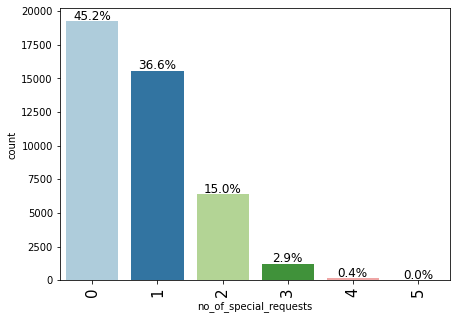

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(data, "no_of_special_requests", perc=True)

* 45.2% of the customers generally do not make any requests while booking a hotel room.

### Observations on booking status

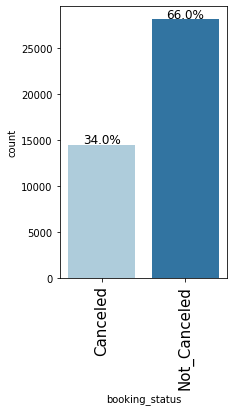

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(data, "booking_status", perc=True)

* 34% of the bookings were canceled by the customers.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [33]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

<IPython.core.display.Javascript object>

### Bivariate Analysis

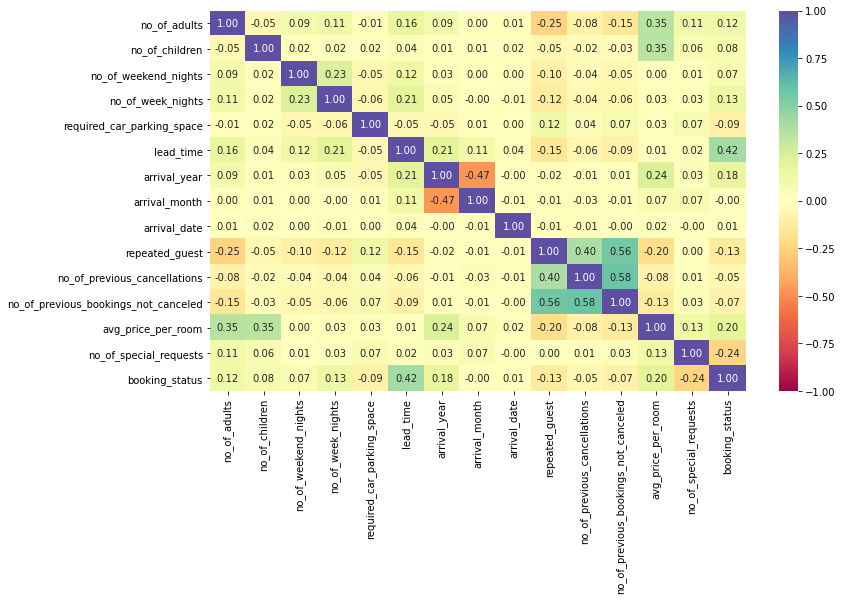

<IPython.core.display.Javascript object>

In [34]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There's a positive correlation between the number of customers (adults and children) and the average price per room.
    * This makes sense as more the number of customers more usage of hotel facilities thus increasing the cost.
* There's a negative correlation between average room price by a customer and repeated guests. The hotel might be giving some loyalty benefits to the customers.
* There's a positive correlation between the number of previous bookings canceled and previous bookings not canceled by a customer and repeated guest. 
* There's a positive correlation between lead time and the number of weeknights a customer is planning to stay in the hotel.
* There's a positive correlation between booking status and lead time, indicating higher the lead time higher are the chances of cancellation. We will analyze it further.
* There's a negative correlation between the number of special requests from the customer and the booking status, indicating if a customer has made some special requests the chances of cancellation might decrease. We will analyze it further.

**Creating functions that will help us with further analysis.**

In [35]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [36]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

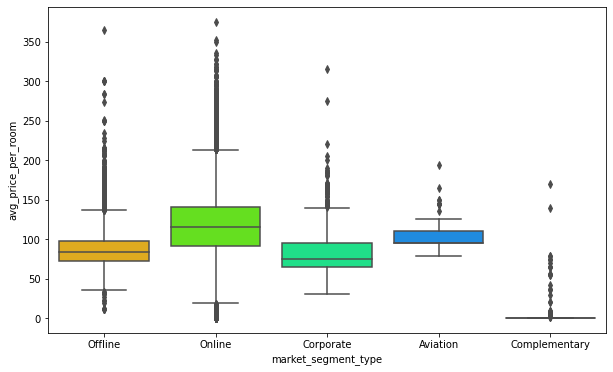

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* Rooms booked online have high variations in prices.
* The offline and corporate room prices are similar.
* Complementary market segment gets the rooms at very low prices, which makes sense.

**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

booking_status           0      1    All
market_segment_type                     
All                  28089  14487  42576
Online               20686  13483  34169
Offline               4973    804   5777
Corporate             1772    167   1939
Aviation               162     33    195
Complementary          496      0    496
------------------------------------------------------------------------------------------------------------------------


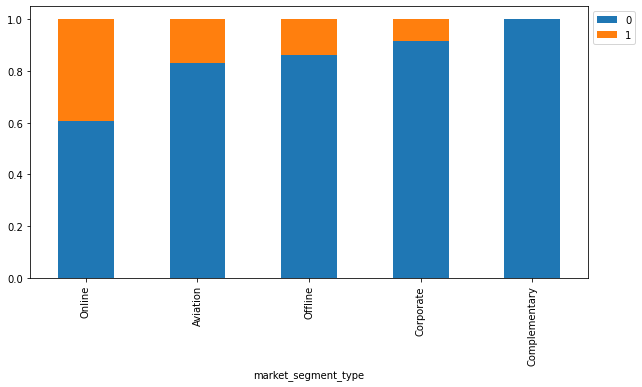

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(data, "market_segment_type", "booking_status")

* Around 40% of the online booking were canceled.
* Bookings made offline are less prone to cancellations.
* Corporate and Complementary segment shows least cancellations

**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**

booking_status              0      1    All
no_of_special_requests                     
All                     28089  14487  42576
0                       10476   8752  19228
1                       11225   4346  15571
2                        4992   1389   6381
3                        1230      0   1230
4                         150      0    150
5                          16      0     16
------------------------------------------------------------------------------------------------------------------------


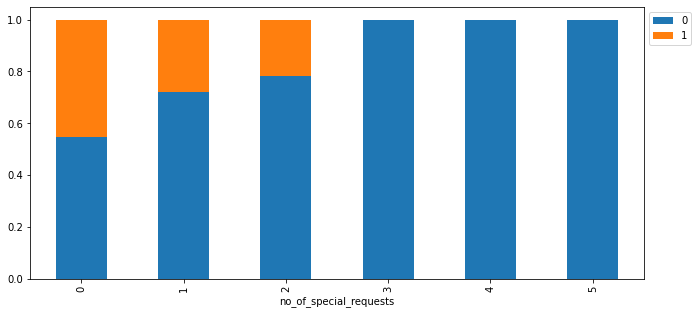

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

* If a customer has made more than 2 requests there's a very high chance that the booking will not be canceled.

**Let's see if the special requests made by the customers impacts the prices of a room**

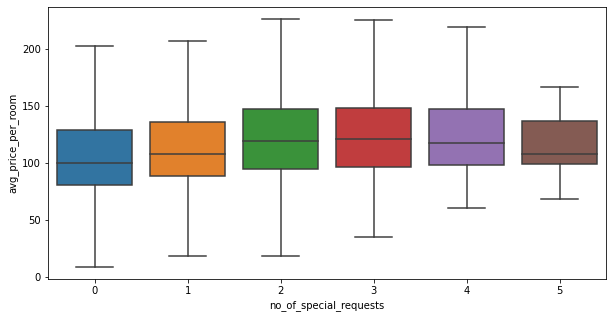

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data,
    x="no_of_special_requests",
    y="avg_price_per_room",
    showfliers=False,  # turning off the outliers
)
plt.show()

* The median prices of the rooms where some special requests were made by the customers are slightly higher than the rooms where customer didn't make any requests.

**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it**

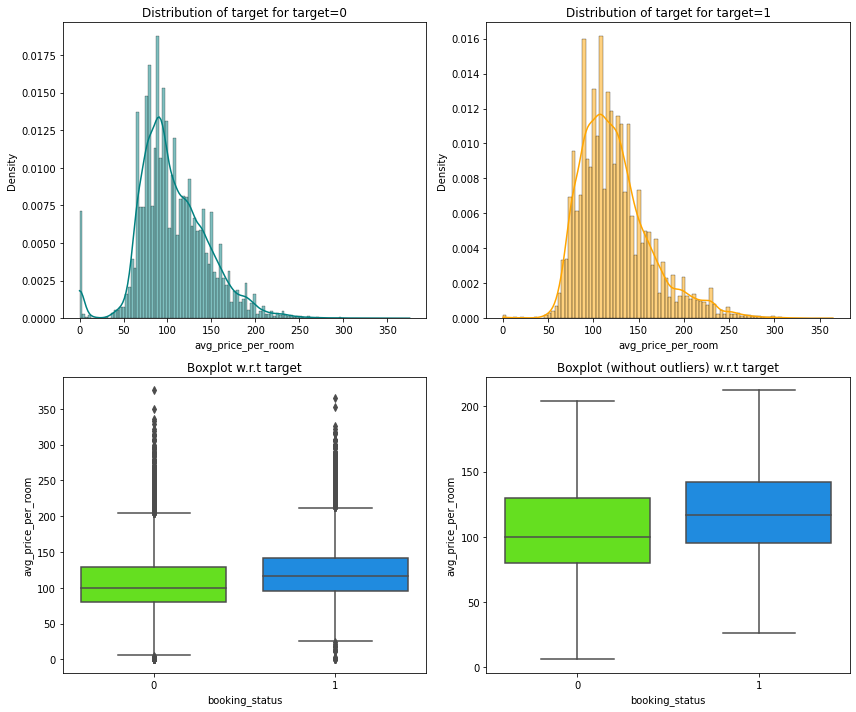

<IPython.core.display.Javascript object>

In [41]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

* The distribution of price for canceled and booking which were not canceled is quite similar.
* The prices for the canceled bookings are slightly higher than the booking which were not canceled.

**There is a positive correlation between booking status and lead time also. Let's analyze it further**

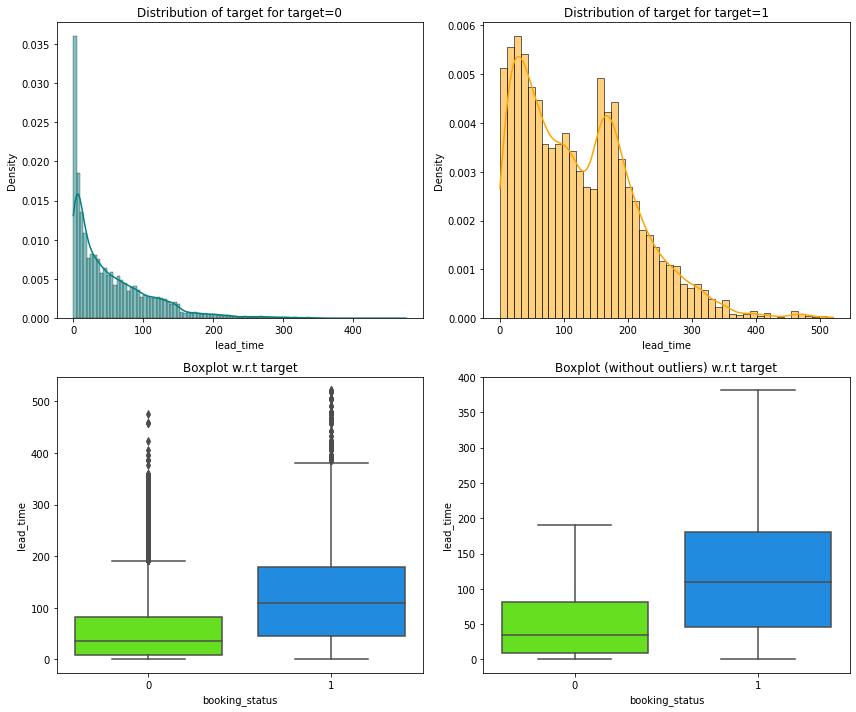

<IPython.core.display.Javascript object>

In [42]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

* There's a big difference in the median value of lead time for bookings that were canceled and bookings that were not canceled.
* Higher the lead time higher are the chances of a booking being canceled.

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [43]:
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(35128, 18)

<IPython.core.display.Javascript object>

In [44]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

<IPython.core.display.Javascript object>

booking_status            0      1    All
no_of_family_members                     
All                   22306  12822  35128
2                     17994   9284  27278
3                      3600   2714   6314
4                       686    803   1489
5                        26     21     47
------------------------------------------------------------------------------------------------------------------------


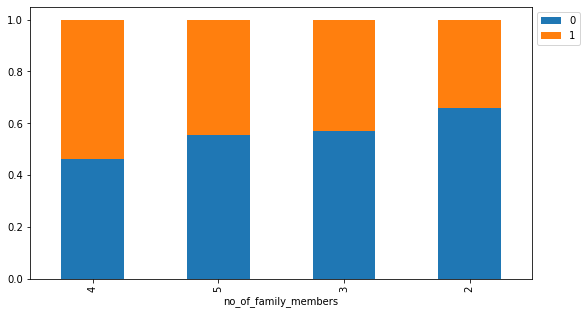

<IPython.core.display.Javascript object>

In [45]:
stacked_barplot(family_data, "no_of_family_members", "booking_status")

* We can see that as the size of the family increases the chances of cancellation also increases.
* There's a ~50% chance of a booking getting canceled if the booking is made for 4 family members.

**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [46]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(22049, 18)

<IPython.core.display.Javascript object>

In [47]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

<IPython.core.display.Javascript object>

booking_status      0     1    All
total_days                        
All             13881  8168  22049
3                4240  2273   6513
4                3922  2107   6029
5                2106  1156   3262
2                1542   768   2310
7                 881   731   1612
6                 819   594   1413
8                 140   157    297
10                 66    94    160
9                  80    84    164
14                 11    58     69
11                 25    35     60
12                 16    30     46
15                  5    20     25
13                  7    18     25
16                  3     9     12
19                  3     8     11
20                  4     7     11
17                  2     5      7
21                  4     4      8
18                  2     3      5
22                  2     3      5
24                  0     3      3
23                  1     1      2
------------------------------------------------------------------------------------------

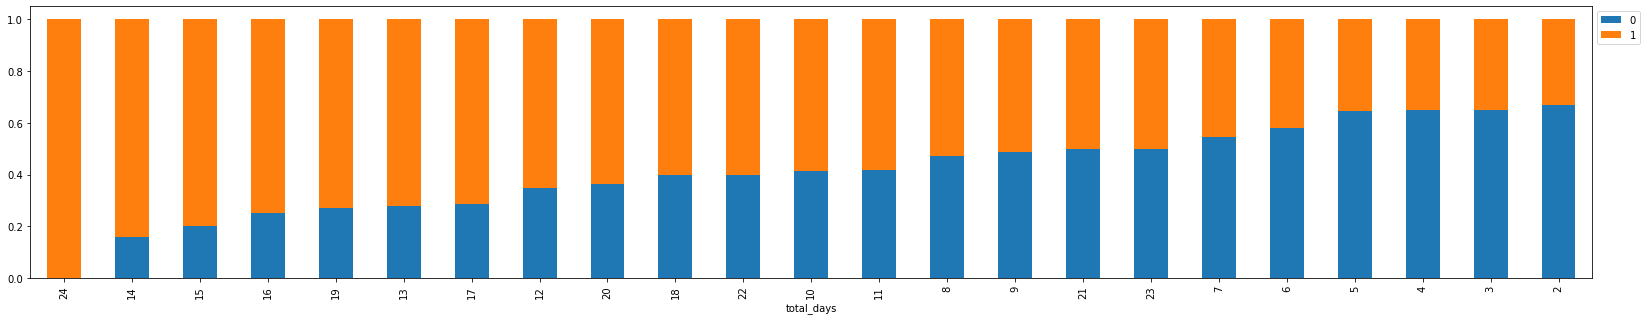

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(stay_data, "total_days", "booking_status")

* The chances of cancellation increase as the number of days the customer planned to stay at the hotel increases.
* The chances of cancellation increase further if the stay is planned for more than 5 days.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

booking_status      0      1    All
repeated_guest                     
All             28089  14487  42576
0               26784  14477  41261
1                1305     10   1315
------------------------------------------------------------------------------------------------------------------------


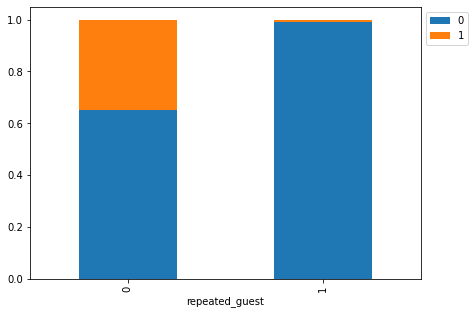

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(data, "repeated_guest", "booking_status")

* There are very few repeat customers but the cancellation among them is very less.
* This is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.
* A loyal guest is usually more profitable for the business because they are more familiar with what is on offer at a hotel they have visited before.
* Attracting new customers is tedious and costs more as compared to a repeated guest.

**Let's find out what are the busiest months in the hotel.**

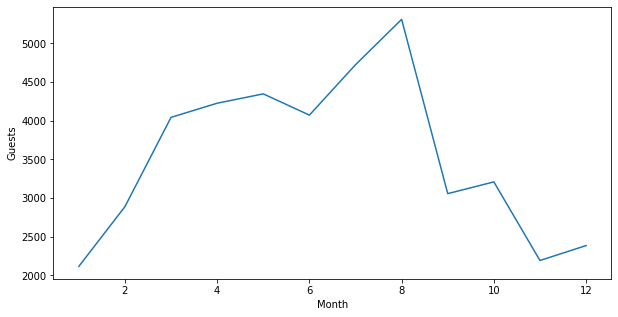

<IPython.core.display.Javascript object>

In [50]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

* The trend shows the number of bookings remains consistent from March to June and the hotel sees around 4000 to 4500 guests.
* Most bookings were made in July and August- more than 5000 bookings. 
* Least bookings were made in January and November - around 2000 bookings.

**Let's check the percentage of bookings canceled in each month.**

booking_status      0      1    All
arrival_month                      
All             28089  14487  42576
8                2837   2475   5312
7                2485   2240   4725
5                2674   1674   4348
4                2600   1627   4227
6                2489   1584   4073
3                2849   1195   4044
10               2291    918   3209
9                2169    888   3057
2                2093    796   2889
11               1696    496   2192
12               2045    340   2385
1                1861    254   2115
------------------------------------------------------------------------------------------------------------------------


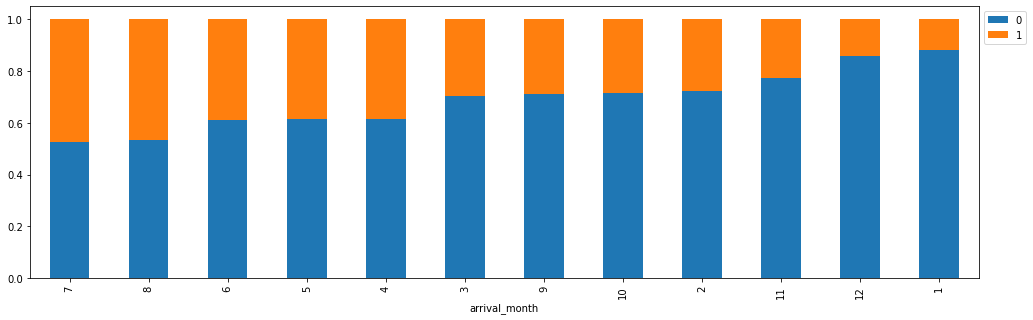

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(data, "arrival_month", "booking_status")

* We see that even though the highest number of bookings were made in July and August - 50% of these bookings got canceled.
* Least bookings were canceled in December and January - customers might have traveled to celebrate Christmas and New Year.
* 30% of bookings getting canceled is consistent across February, March, September, and October.
* The hotel had to cater to the highest number of customers in March.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

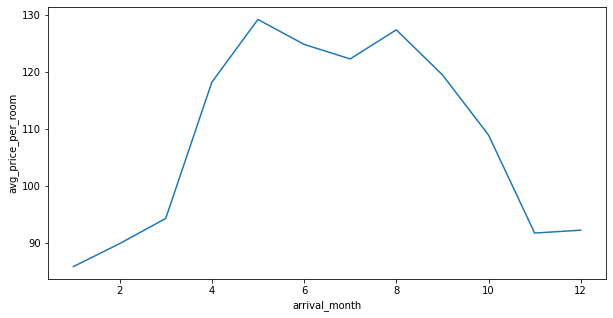

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()

* The price of rooms is highest in May to August - vary from 120-130 euros per room.

### Outlier Check

- Let's check for outliers in the data.

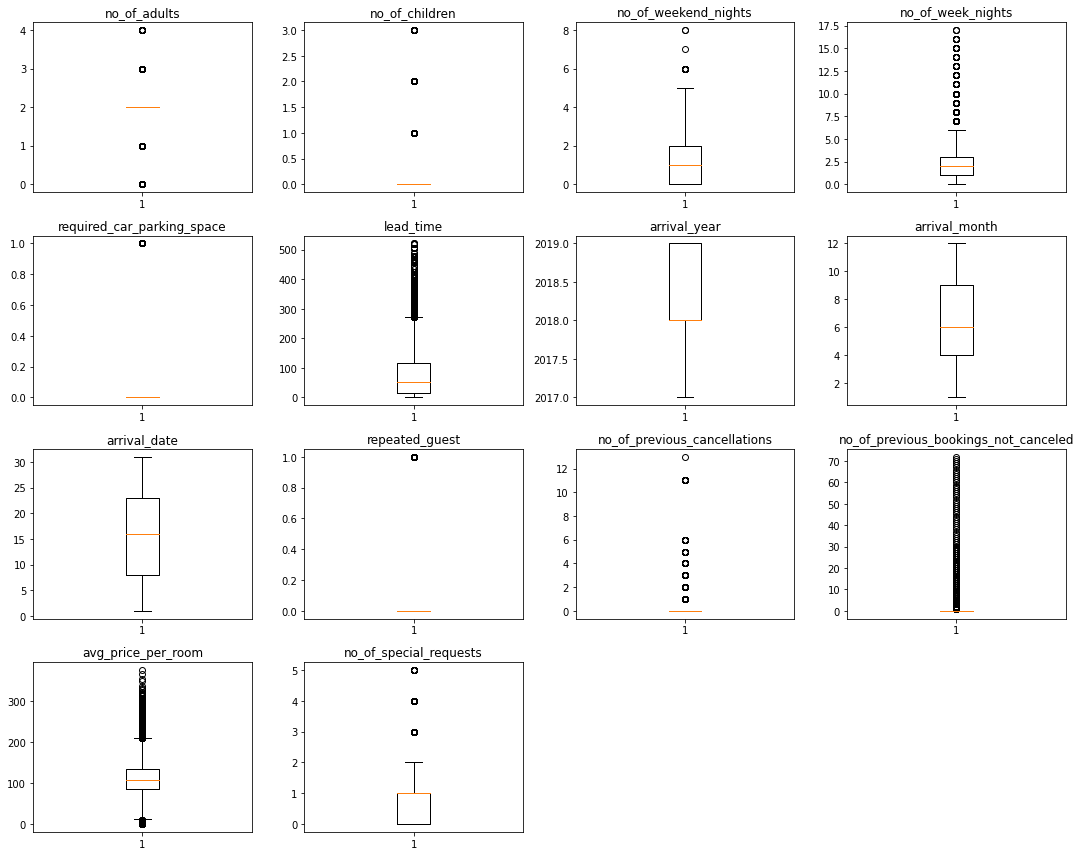

<IPython.core.display.Javascript object>

In [53]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

### Data Preparation for modeling

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [54]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [55]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (29803, 27)
Shape of test set :  (12773, 27)
Percentage of classes in training set:
0   0.66107
1   0.33893
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.65662
1   0.34338
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [56]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [57]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression (with Sklearn library)

In [58]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [59]:
# predicting on training set
y_pred_train = lg.predict(X_train)

<IPython.core.display.Javascript object>

In [60]:
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.79273898600812
Precision: 0.7317505315379164
Recall: 0.6133056133056133
F1: 0.6673129746324123


<IPython.core.display.Javascript object>

#### Checking performance on test set

In [61]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

<IPython.core.display.Javascript object>

In [62]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.790965317466531
Precision: 0.7358438702583837
Recall: 0.6103511171910625
F1: 0.6672482552342971


<IPython.core.display.Javascript object>

**Observations**

- F1 score on the training and test set is very close, which indicates our model is not overfitting and the model is a good fit.
- The F1 score is 0.66 on the training and test set.
- The model has high precision and low recall. To get a good F1 score the precision and recall should be comparable.

### Logistic Regression (with statsmodels library)

In [63]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [64]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29775
Method:                           MLE   Df Model:                           27
Date:                Sat, 04 Sep 2021   Pseudo R-squ.:                  0.3292
Time:                        15:46:06   Log-Likelihood:                -12801.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   93.9680     68.721      1.367      0.172     -40.723     228.659
no_of_adults                            -0.0324      

<IPython.core.display.Javascript object>

In [65]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79277,0.61370,0.73162,0.66749


<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient show that the probability of customers canceling the booking decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of customer canceling increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Multicollinearity

In [66]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [67]:
checking_vif(X_train)

,feature,VIF
0,const,18622871.10059
1,no_of_adults,1.45264
2,no_of_children,2.15971
3,no_of_weekend_nights,1.08317
4,no_of_week_nights,1.13003
5,required_car_parking_space,1.03601
6,lead_time,1.33304
7,arrival_year,1.80028
8,arrival_month,1.54961
9,arrival_date,1.00490


<IPython.core.display.Javascript object>

**Observations**

- None of the numerical variables show moderate or high multicollinearity.
- We will ignore the VIF for the dummy variables.

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [68]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_children', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 6', 'market_segment_type_Complementary', 'market_segment_type_Offline', 'market_segment_type_Online']


<IPython.core.display.Javascript object>

In [69]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

<IPython.core.display.Javascript object>

In [70]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29789
Method:                           MLE   Df Model:                           13
Date:                Sat, 04 Sep 2021   Pseudo R-squ.:                  0.3271
Time:                        15:46:09   Log-Likelihood:                -12841.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.3114      0.119    -27.900      0.000      -3.544      -3.079
no_of_children                           0.0945      

<IPython.core.display.Javascript object>

In [71]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79314,0.61192,0.73356,0.66724


<IPython.core.display.Javascript object>

* All the variables left a significant (P-value<0.5).
* So we can say that lg1 is the best model for making any inference.
* The performance on the training data is the same as before dropping the variables with the high p-value.

### Coefficient interpretations

* Coefficients of required_car_parking_space, arrival_month, no_of_previous_bookings_not_canceled, no_of_special_requests, room_type_reserved_Room_Type 6, market_segment_type_Complementary, market_segment_type_Offline are negative an increase in these will lead to a decrease in chances of a customer canceling their booking.
* Coefficients of no_of_children, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected, market_segment_type_Online are positive an increase in these will lead to a increase in the chances of a customer canceling their booking.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [72]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_children,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 6,market_segment_type_Complementary,market_segment_type_Offline,market_segment_type_Online
Odds,0.03647,1.09913,1.07615,0.22417,1.01680,0.96652,0.60463,1.01508,0.27525,1.46661,0.74310,0.00000,0.21215,1.97447
Change_odd%,-96.35332,9.91330,7.61459,-77.58288,1.67978,-3.34753,-39.53711,1.50755,-72.47505,46.66106,-25.68988,-100.00000,-78.78482,97.44685


<IPython.core.display.Javascript object>

### Coefficient interpretations

* `no_of_children`: Holding all other features constant a 1 unit change in the number of children will increase the odds of a booking getting cancelled by 1.09 times or a 9.9% increase in the odds of a booking getting cancelled.
* `no_of_week_nights`: Holding all other features constant a 1 unit change in the number of weeknights a customer stays at the hotel will increase the odds of a booking getting cancelled by 1.07 times or a 7.61% increase in the odds of a booking getting cancelled.
* `required_car_parking_space`: The odds of a customer who requires a car parking space are 0.22 times less than a customer who doesn't require a car parking space or a 77.58% fewer odds of a customer canceling their booking.
* `lead_time`: Holding all other features constant a 1 unit change in the lead time will increase the odds of a booking getting cancelled by 1.01 times or a 1.6% increase in the odds of a booking getting cancelled.
* `no_of_special_requests`: Holding all other features constant a 1 unit change in the number of special requests made by the customer will decrease the odds of a booking getting cancelled by 0.27 times or a 72.47% decrease in the odds of a booking getting cancelled.
* `avg_price_per_room`: Holding all other features constant a 1 unit change in the lead time will increase the odds of a booking getting cancelled by 1.01 times or a 1.50% increase in the odds of a booking getting cancelled.
* `no_of_previous_bookings_not_canceled`: Holding all other features constant a 1 unit change in the number of previous bookings not canceled will decrease the odds of a booking getting cancelled by 0.60 times or a 39.53% decrease in the odds of a booking getting canceled.
* `type_of_meal_plan_Not Selected`: The odds of a customer who has not selected any meal plan cancelling the booking are 1.46 times more than a customer who has selected a meal plan or a 46.66% higher odds of a booking getting cancelled if a meal plan is not selected. [keeping all the other meal plan types as reference]
* `market_segment_type_Online`: The odds of a customer who has done the booking online cancelling the booking are 1.97 times more than customers of the Corporate or Aviation market segment or a 97% higher odds of a booking getting cancelled if the booking is done online. [keeping corporate and aviation market segment as reference]


`Interpretation for other attributes can be done similarly.`

#### Checking model performance on the training set

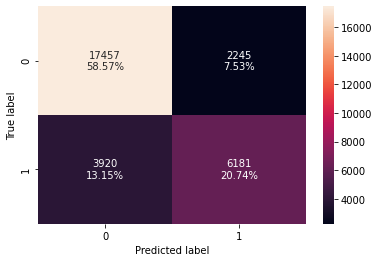

<IPython.core.display.Javascript object>

In [73]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [74]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79314,0.61192,0.73356,0.66724


<IPython.core.display.Javascript object>

#### ROC-AUC
* ROC-AUC on training set

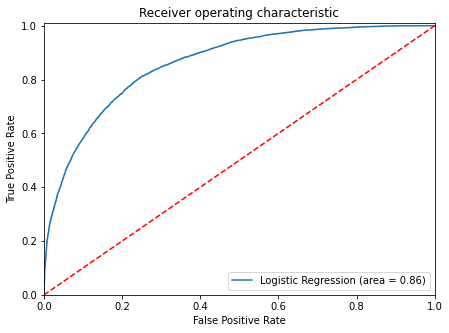

<IPython.core.display.Javascript object>

In [75]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test set.
* ROC-AUC score of 0.86 on training is quite good.

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [76]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.30557571842391124


<IPython.core.display.Javascript object>

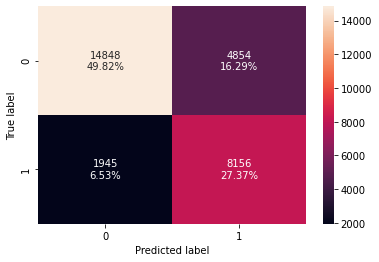

<IPython.core.display.Javascript object>

In [77]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [78]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.77187,0.80744,0.62690,0.70581


<IPython.core.display.Javascript object>

* Recall has increased significantly as compared to the previous model.
* As we will decrease the threshold value, Recall will keep on increasing and the Precision will decrease, but this is not right, we need to choose an optimal balance between recall and precision.

#### Let's use Precision-Recall curve and see if we can find a better threshold

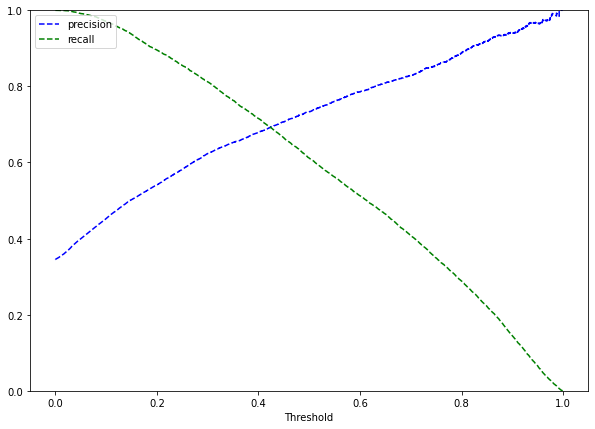

<IPython.core.display.Javascript object>

In [79]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At 0.42 threshold we get a balanced precision and recall.

In [80]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

#### Checking model performance on training set

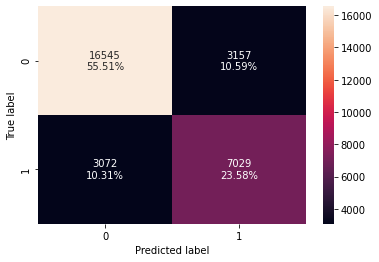

<IPython.core.display.Javascript object>

In [81]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [82]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79099,0.69587,0.69006,0.69296


<IPython.core.display.Javascript object>

* Model performance has improved as compared to our initial model.
* Model has given a balanced performance in terms of precision and recall.

### Let's check the performance on the test set

**Using model with default threshold**

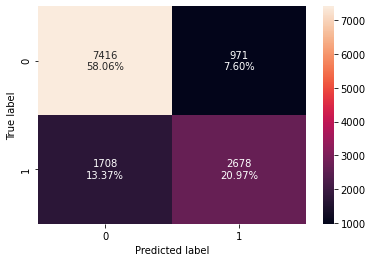

<IPython.core.display.Javascript object>

In [83]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [84]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79026,0.61058,0.73390,0.66658


<IPython.core.display.Javascript object>

* ROC curve on test set

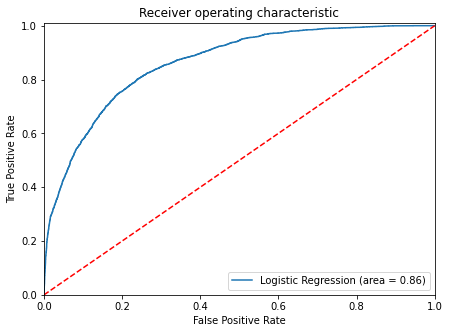

<IPython.core.display.Javascript object>

In [85]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.30** 

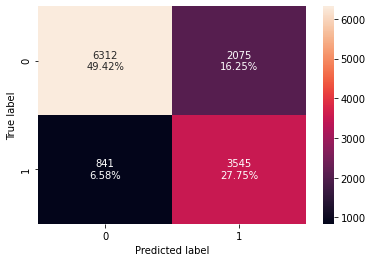

<IPython.core.display.Javascript object>

In [86]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [87]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.77171,0.80825,0.63078,0.70857


<IPython.core.display.Javascript object>

**Using model with threshold = 0.42**

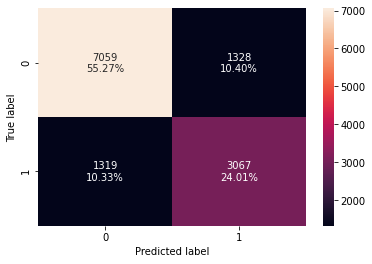

<IPython.core.display.Javascript object>

In [88]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [89]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79277,0.69927,0.69784,0.69855


<IPython.core.display.Javascript object>

### Model performance summary

In [90]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.30 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.30 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.79314,0.77187,0.79099
Recall,0.61192,0.80744,0.69587
Precision,0.73356,0.62690,0.69006
F1,0.66724,0.70581,0.69296


<IPython.core.display.Javascript object>

### Observations from Logistic Regression model
- We have been able to build a predictive model that can be used by the hotel to predict which bookings are likely to be cancelled with an F1 score of 0.69 on the training set and formulate marketing policies accordingly.

* The logistic regression models are giving a generalized performance on training and test set.

* **Using the model with default threshold the model will give a low recall but good precision score -** The hotel will be able to predict which bookings will not be cancelled and will be able to provide satisfactory services to those customers which help in maintaining the brand equity but will lose on resources. 
* **Using the model with a 0.30 threshold the model will give a high recall but low precision score -** The hotel will be able to save resources by correctly predicting the bookings which are likely to be cancelled but might damage the brand equity.
* **Using the model with a 0.45 threshold the model will give a balance recall and precision score -** The hotel will be able to maintain a balance between resources and brand equity. 

* Coefficients of required_car_parking_space, arrival_month, no_of_previous_bookings_not_canceled, no_of_special_requests, room_type_reserved_Room_Type 6, market_segment_type_Complementary, market_segment_type_Offline are negative an increase in these will lead to a decrease in chances of a customer canceling their booking.
* Coefficients of no_of_children, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected, market_segment_type_Online are positive an increase in these will lead to an increase in the chances of a customer canceling their booking.

## Decision Tree

In [91]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [92]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [93]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Building Decision Tree Model

In [94]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

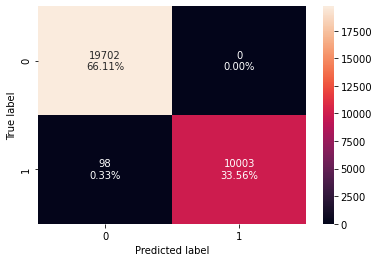

<IPython.core.display.Javascript object>

In [95]:
confusion_matrix_statsmodels(model, X_train, y_train)

In [96]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99671,0.99030,1.00000,0.99513


<IPython.core.display.Javascript object>

* Almost 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* Let's check the performance on test data to see if the model is overfitting.

#### Checking model performance on test set

In [97]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.78838,0.69631,0.69017,0.69322


<IPython.core.display.Javascript object>

* The decision tree model is overfitting the data as expected and not able to generalize well on the test set.
* We will have to prune the decision tree.

**Before pruning the tree let's check the important features.**

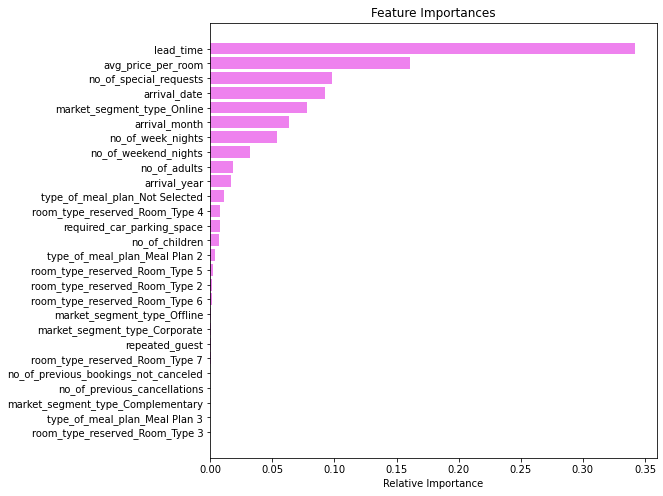

<IPython.core.display.Javascript object>

In [98]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time is the most important feature followed by average price per room and number of special requests.
* Now let's prune the tree to see if we can reduce the complexity.

### Pruning the tree

**Pre-Pruning**

In [99]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=30, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

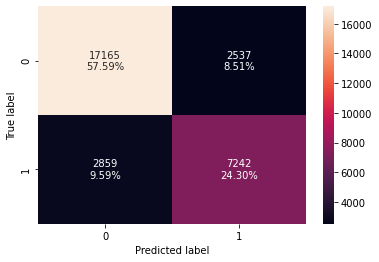

<IPython.core.display.Javascript object>

In [100]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [101]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.81894,0.71696,0.74057,0.72857


<IPython.core.display.Javascript object>

#### Checking performance on training set

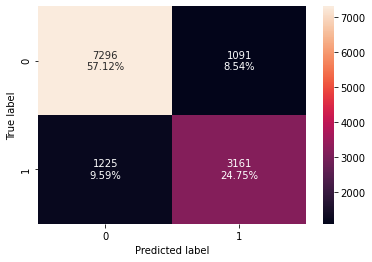

<IPython.core.display.Javascript object>

In [102]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [103]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.81868,0.72070,0.74341,0.73188


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

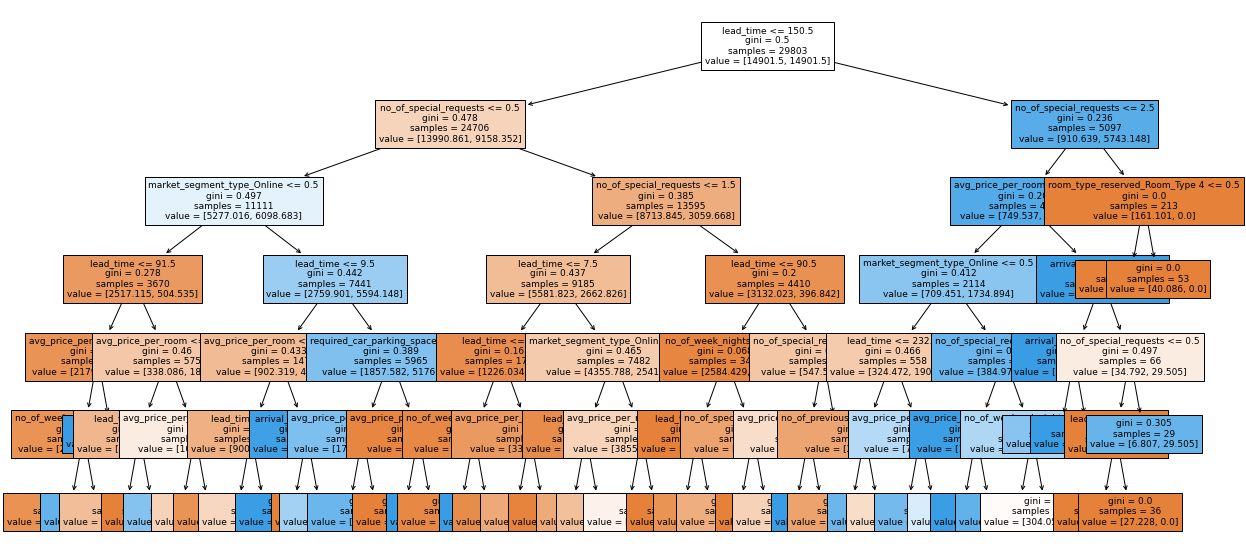

<IPython.core.display.Javascript object>

In [104]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [105]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 91.50
|   |   |   |   |--- avg_price_per_room <= 207.90
|   |   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |   |--- weights: [2176.76, 296.53] class: 0
|   |   |   |   |   |--- no_of_weekend_nights >  3.50
|   |   |   |   |   |   |--- weights: [2.27, 10.33] class: 1
|   |   |   |   |--- avg_price_per_room >  207.90
|   |   |   |   |   |--- weights: [0.00, 8.85] class: 1
|   |   |   |--- lead_time >  91.50
|   |   |   |   |--- avg_price_per_room <= 91.22
|   |   |   |   |   |--- lead_time <= 144.50
|   |   |   |   |   |   |--- weights: [210.26, 101.79] class: 0
|   |   |   |   |   |--- lead_time >  144.50
|   |   |   |   |   |   |--- weights: [25.72, 0.00] class: 0
|   |   |   |   |--- avg_price_per_room >  91.22
|   |   |   |   |   |--- avg_price_per_room <= 96.61
|   |   |   |   |   |   |--- weights: [10.59, 28.03] class:

<IPython.core.display.Javascript object>

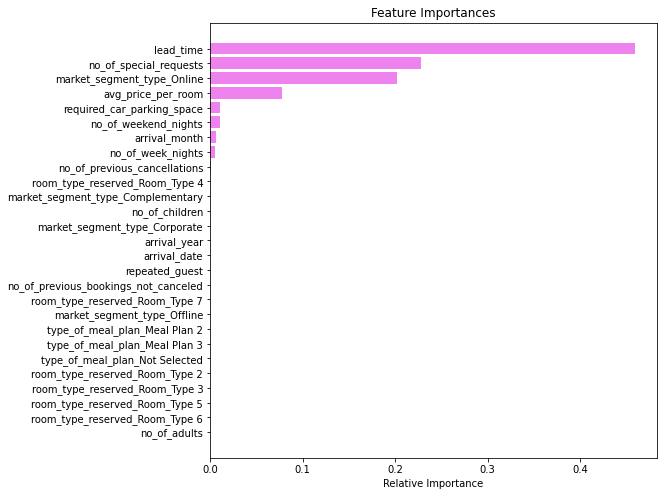

<IPython.core.display.Javascript object>

In [106]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations from decision tree

* We can see that the tree has become simpler and the rules of the trees are readable.
* The model performance of the model has been generalized.


* We observe that the most important features are:
    * Lead Time
    * Number of special requests
    * Market Segment - Online
    * Average price per room

**The rules obtained from the decision tree can be interpreted as:**

* The rules show that lead time plays a key role in identifying if a booking will be cancelled or not. 150 days has been considered as a threshold value by the model to make the first split.

**Bookings made more than 150 days before the date of arrival:**

* If the customer has more than 2 special requests the booking is less likely to be cancelled. 
* If the customer has less than or equal to 2 special requests, the average price per room is more than 100 euros, there is a high chance of booking getting cancelled, although if the average price per room of room is less than 100 euros, and that booking was not done Online it is less likely to get canceled.

**Bookings made under 150 days before the date of arrival:**

* If a customer has at least 1 special request the booking is less likely to be cancelled. 
* If the customer didn't make any special requests and the booking was done Online it is more likely to get canceled.

`If we want more complex then we can go in more depth of the tree`

**Cost Complexity Pruning**

In [107]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [108]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00329
1,-0.00000,0.00329
2,-0.00000,0.00329
3,0.00000,0.00329
4,0.00000,0.00329
...,...,...
2639,0.00804,0.33556
2640,0.00825,0.34381
2641,0.01313,0.35694
2642,0.03363,0.42419


<IPython.core.display.Javascript object>

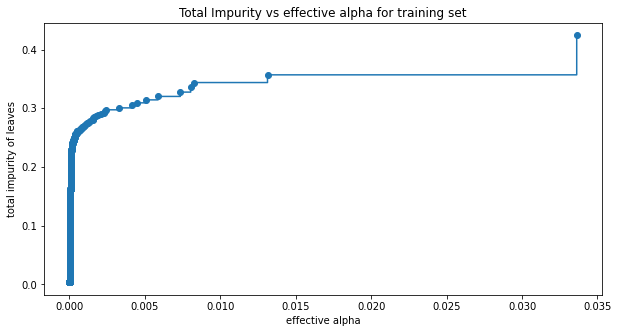

<IPython.core.display.Javascript object>

In [109]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [110]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07580716995467879


<IPython.core.display.Javascript object>

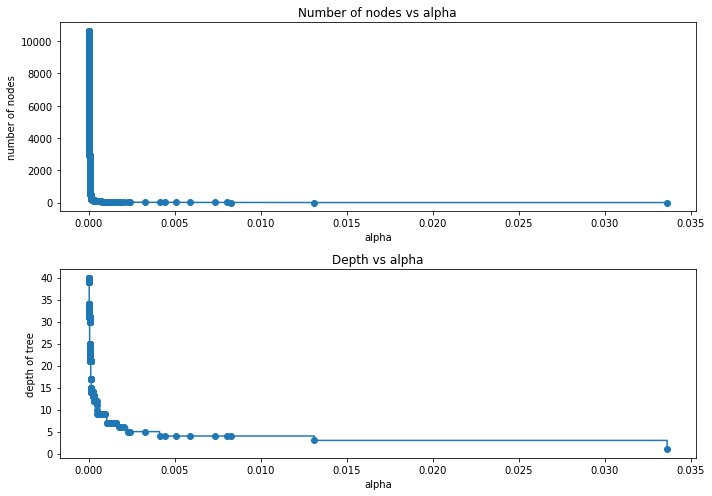

<IPython.core.display.Javascript object>

In [111]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [112]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

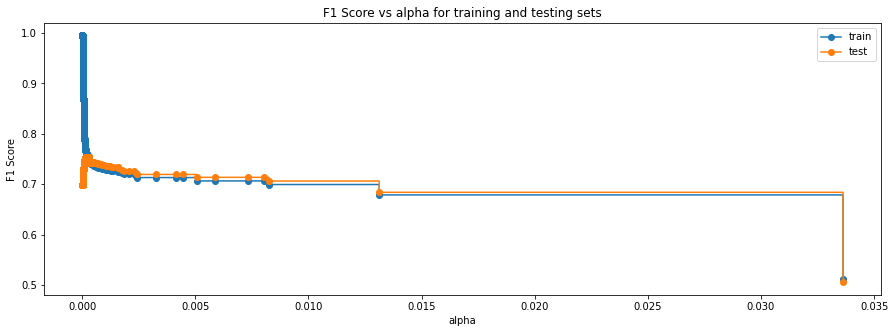

<IPython.core.display.Javascript object>

In [113]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [114]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0002777229620945119, class_weight='balanced',
                       random_state=1)


<IPython.core.display.Javascript object>

#### Checking performance on training set

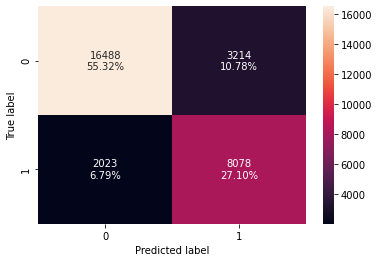

<IPython.core.display.Javascript object>

In [115]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [116]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.82428,0.79972,0.71537,0.75520


<IPython.core.display.Javascript object>

#### Checking performance on test set

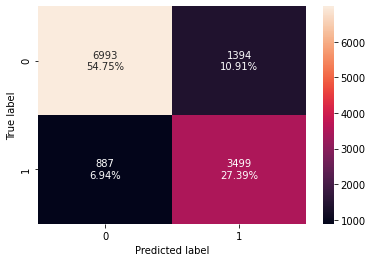

<IPython.core.display.Javascript object>

In [117]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [118]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.82142,0.79777,0.71510,0.75418


<IPython.core.display.Javascript object>

**Observations**
* After post pruning the decision tree the performance has generalized on training and test set.
* We are getting high recall with this model but difference between recall and precision has increased.

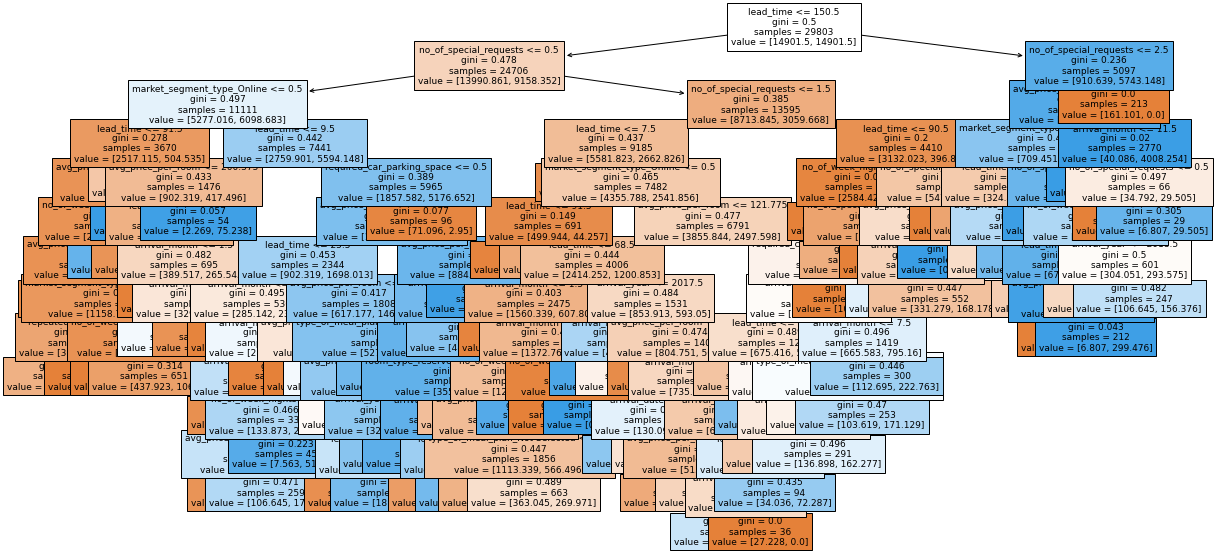

<IPython.core.display.Javascript object>

In [119]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [120]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 91.50
|   |   |   |   |--- avg_price_per_room <= 207.90
|   |   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |   |--- avg_price_per_room <= 75.54
|   |   |   |   |   |   |   |--- weights: [1018.04, 84.09] class: 0
|   |   |   |   |   |   |--- avg_price_per_room >  75.54
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [281.36, 106.22] class: 0
|   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [88.49, 0.00] class: 0
|   |   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [350.94, 0.00] class: 0
|   |   |   |   | 

<IPython.core.display.Javascript object>

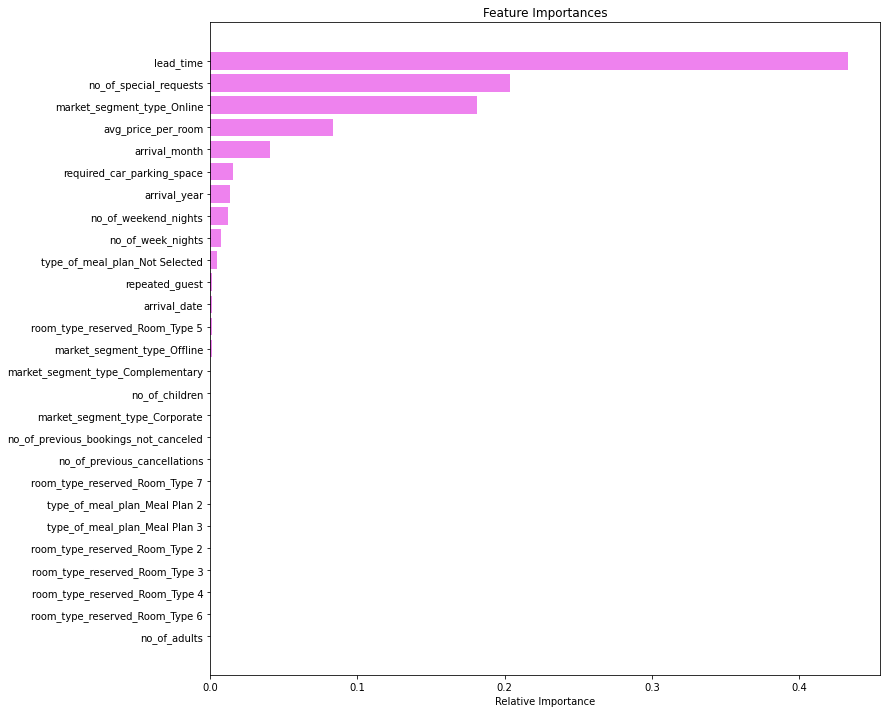

<IPython.core.display.Javascript object>

In [121]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations from tree**
* The tree is quite complex as complex as compared to the pre-pruned tree.
* The feature importance is same as we got in pre-pruned tree.

### Comparing Decision Tree models

In [122]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99671,0.81894,0.82428
Recall,0.99030,0.71696,0.79972
Precision,1.00000,0.74057,0.71537
F1,0.99513,0.72857,0.75520


<IPython.core.display.Javascript object>

In [123]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.78838,0.81868,0.82142
Recall,0.69631,0.72070,0.79777
Precision,0.69017,0.74341,0.71510
F1,0.69322,0.73188,0.75418


<IPython.core.display.Javascript object>

**Observations**
* Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
* Pre-pruned tree has given a generalized performance with balanced values of precision and recall.
* Post-pruned tree is giving a high F1 score as compared to other models but the difference between precision and recall is high.
* The hotel will be able to maintain a balance between resources and brand equity using the pre-pruned decision tree model.

### Conclusion
* Overall we can see that the Decision Tree model performs better on the dataset.
* Looking at important variables based on p-values in Logistic regression and feature importance in the Decision Tree model
    * Lead Time, Number of special requests, Market Segment - Online, Average price per room are important in both model
    * From the Logistic Regression model we observe that Lead Time, Average price per room, and Online market segment have a positive relation with bookings getting canclled. And the number of special requests has negative relation with bookings getting cancelled.

### Business Recommendations

1. The lead time and the number of special requests made by the customer play a key role in identifying if a booking will be cancelled or not. 

   Bookings where a customer has made a special request and the booking was done under 150 days to the date of arrival are less likely to be canceled. But the likelihood of a booking getting cancelled increases if the booking was done more than 150 days before the date of arrival.

    * Using this information, the hotel can take the following actions for the customer who have booked more than 150 days in advance:
        * Set up a system that can send a prompt like an automated email to the customers 90 days before the arrival date asking for a  re-confirmation of their booking and any changes they would like to make in their bookings.
        * Remind guests about imminent deadlines 1 month prior to the date of arrival.
 
The response given by the customer will give the hotel ample time to re-sell the room or make preparations for the customers' requests.

Note: The thresholds have been decided based on the distribution of the lead time for the bookings that were not cancelled. The median and the 75th percentile of the lead time for such bookings is around 30 days and 90 days.

2. Stricter cancellation policies can be adopted by the hotel. 
    * The bookings where the average price per room is high, and there were special requests associated should not get a full refund as the loss of resources will be high in these cases.
    * Ideally the cancellation policies should be consistent across all market segments but as noticed in our analysis high percentage of bookings done online are cancelled. The booking cancelled online should yield less percentage of refund to the customers.
    
The refunds, cancellation fee, etc should be highlighted on the website/app before a customer confirms their booking to safeguard guests' interest.

3. The length of stay at the hotel can be restricted.
    * We saw in our analysis that bookings, where the total length of stay was more than 5 days, had higher chances of getting cancelled.
    * Hotel can allow bookings up to 5 days only and then customers should be asked to re-book if they wish to stay longer. These policies can be relaxed for corporate and Aviation market segments. For other market segments, the process should be fairly easy to not hamper their experience with the hotel.

Such restrictions can be strategized by the hotel to generate additional revenue.


4. In the months November, December, and January cancellation to non-cancellation ratio is low. Customers might travel to celebrate Christmas and New Year. The hotel should ensure that enough human resources are available to cater to the needs of the guests.


5. July and August saw the highest number of bookings but also the highest number of cancellations. This should be investigated further by the hotel. 



6. Improving the experience of repeated customers.

    * Our analysis shows that there are very few repeated customers and the cancellation among them is very less which is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.
    * A loyal guest is usually more profitable for the business because they are more familiar with offerings from the hotel they have visited before.
    * Attracting new customers is tedious and costs more as compared to a repeated guest.
    * A loyalty program that offers - special discounts, access to services in hotels, etc for these customers can help in improving their experience.